In [128]:
import pandas as pd
import numpy as np

# Librerías para plotear
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns

plt.style.use('ggplot')

#librería para prueba t
from scipy.stats import ttest_ind
# Librería para prueba z de proporciones
from statsmodels.stats.proportion import proportions_ztest

In [4]:
#leemos los datos
df = pd.read_csv('UCI_Credit_Card.csv')

In [5]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Descodificar las categorías

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [42]:
def gender(sex):
    if sex == 1:
        return 'Hombre'
    elif sex == 2:
        return 'Mujer'
    else:
        return 'Sin Información'
    
df['COD_SEX'] = df.SEX.apply(gender)

In [43]:
def education(ed):
    if ed == 1:
        return 'Posgrado'
    elif ed == 2:
        return 'Universitario'
    elif ed == 3:
        return 'Bachillerato'
    elif ed == 4:
        return 'Otros'
    else:
        return 'Sin Información'
    
df['COD_EDUCATION'] = df.EDUCATION.apply(education)

In [44]:
def marriage(status):
    if status == 1:
        return 'Casado'
    elif status == 2:
        return 'Soltero'
    elif status == 3:
        return 'Otros'
    else:
        return 'Sin Información'
    
df['COD_MARRIAGE'] = df.MARRIAGE.apply(marriage)

# Análisis Monovariable

In [45]:
#función tabla de frecuencia
def tabla_frec(df, nombre):
    #frecuencia relativa
    df['porcentaje_{}'.format(nombre)] = df['Cantidad de Clientes'].apply(lambda x: x/df['Cantidad de Clientes'].sum())
    # frecuencia absoluta y relativa acumulada con cumsum()
    # absoluta acumulada
    df['acumulada__{}'.format(nombre)] = df['Cantidad de Clientes'].cumsum()
    # relativa acumulada
    df['acumulada_procentaje_{}'.format(nombre)]=df['porcentaje_{}'.format(nombre)].cumsum()
    return df

### Barplots

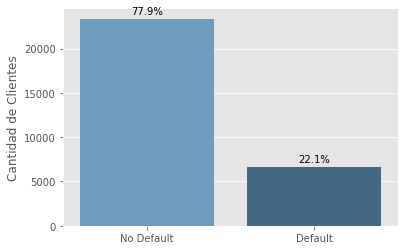

In [40]:
defaults = df['default.payment.next.month'].value_counts().reset_index()
defaults.columns = ['Default', 'Cantidad de Clientes']
defaults['Default_nombre'] = defaults['Default'].apply(lambda x: 'Default' if x == 1 else 'No Default')
ax = sns.barplot(x=defaults['Default_nombre'], y =defaults['Cantidad de Clientes'],palette="Blues_d");
plt.xlabel('')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/sum(defaults['Cantidad de Clientes']))
    x = p.get_x() + p.get_width()-0.4
    y = p.get_height() + 500
    ax.annotate(percentage, (x, y),ha='center')
plt.savefig('default.png', transparent=True, dpi=300, bbox_inches = "tight")

In [24]:
tabla_frec(defaults, 'Defaults')

,Default,Cantidad de Clientes,Default_nombre,porcentaje_Defaults,acumulada__Defaults,acumulada_procentaje_Defaults
0,0,23364,No Default,0.7788,23364,0.7788
1,1,6636,Default,0.2212,30000,1.0000


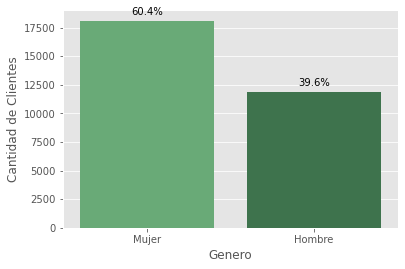

In [48]:
defaults = df['COD_SEX'].value_counts().reset_index()
defaults.columns = ['Genero', 'Cantidad de Clientes']
ax = sns.barplot(x=defaults['Genero'], y =defaults['Cantidad de Clientes'],palette="Greens_d");
#plt.xlabel('')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/sum(defaults['Cantidad de Clientes']))
    x = p.get_x() + p.get_width()-0.4
    y = p.get_height() + 500
    ax.annotate(percentage, (x, y),ha='center')
plt.savefig('Genero.png', transparent=True, dpi=300, bbox_inches = "tight")

In [26]:
tabla_frec(sex, 'Genero')

,Genero,Cantidad de Clientes,porcentaje_Genero,acumulada__Genero,acumulada_procentaje_Genero
0,female,18112,0.603733,18112,0.603733
1,male,11888,0.396267,30000,1.000000


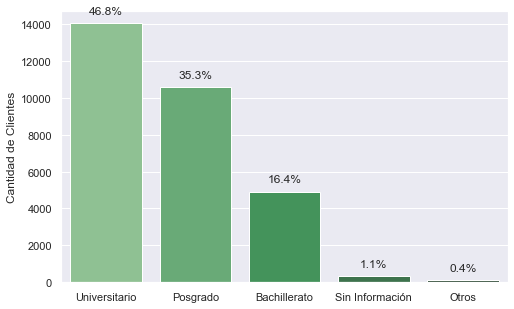

In [69]:
#educación
defaults = df['COD_EDUCATION'].value_counts().reset_index()
defaults.columns = ['Educación', 'Cantidad de Clientes']
ax = sns.barplot(x=defaults['Educación'], y =defaults['Cantidad de Clientes'],palette="Greens_d");
plt.xlabel('')
#plt.title('Educación')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/sum(defaults['Cantidad de Clientes']))
    x = p.get_x() + p.get_width()-0.4
    y = p.get_height() + 500
    ax.annotate(percentage, (x, y),ha='center')
sns.set(rc={'figure.figsize':(8, 5)})
plt.savefig('Educacion.png', transparent=True, dpi=300, bbox_inches = "tight")

In [27]:
tabla_frec(ed, 'Educación')

,Educación,Cantidad de Clientes,porcentaje_Educación,acumulada__Educación,acumulada_procentaje_Educación
0,university,14030,0.473107,14030,0.473107
1,graduate school,10585,0.356938,24615,0.830046
2,high school,4917,0.165807,29532,0.995852
3,others,123,0.004148,29655,1.000000


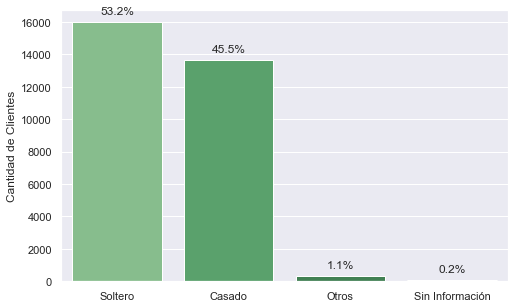

In [71]:
sns.set(rc={'figure.figsize':(8, 5)})

ec = df['COD_MARRIAGE'].value_counts().reset_index()
ec.columns = ['Estado Civil', 'Cantidad de Clientes']
ax = sns.barplot(x=ec['Estado Civil'], y =ec['Cantidad de Clientes'],palette="Greens_d");
plt.xlabel('')
#plt.title('Educación')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/sum(defaults['Cantidad de Clientes']))
    x = p.get_x() + p.get_width()-0.4
    y = p.get_height() + 500
    ax.annotate(percentage, (x, y),ha='center')
plt.savefig('EstadoCivil.png', transparent=True, dpi=300, bbox_inches = "tight")

In [72]:
tabla_frec(ec, 'Estado Civil')

,Estado Civil,Cantidad de Clientes,porcentaje_Estado Civil,acumulada__Estado Civil,acumulada_procentaje_Estado Civil
0,Soltero,15964,0.532133,15964,0.532133
1,Casado,13659,0.455300,29623,0.987433
2,Otros,323,0.010767,29946,0.998200
3,Sin Información,54,0.001800,30000,1.000000


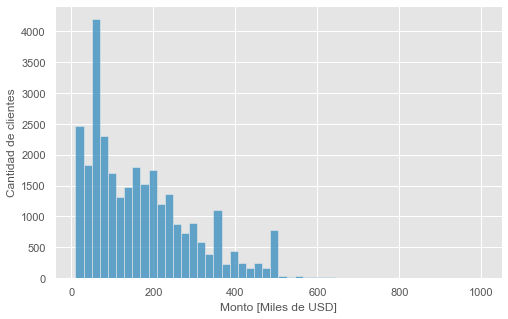

In [83]:
#Amount of the given credit
ax = sns.histplot(df.LIMIT_BAL, bins = 50);

# Change only ax2
scale_x = 1e3
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks_x)

plt.xlabel('Monto [Miles de USD]')
plt.ylabel('Cantidad de clientes')

plt.savefig('montos.png', transparent=True, dpi=300, bbox_inches = "tight")

In [31]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [32]:
df.LIMIT_BAL.mode()

0    50000.0
dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


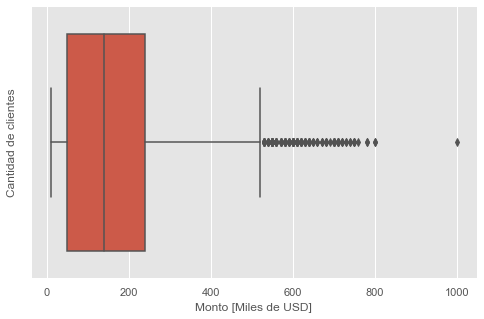

In [92]:
#Amount of the given credit
ax = sns.boxplot(df.LIMIT_BAL);

# Change only ax2
scale_x = 1e3
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks_x)

plt.xlabel('Monto [Miles de USD]')
plt.ylabel('Cantidad de clientes')

plt.savefig('montos_bp.png', transparent=True, dpi=300, bbox_inches = "tight");

In [165]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

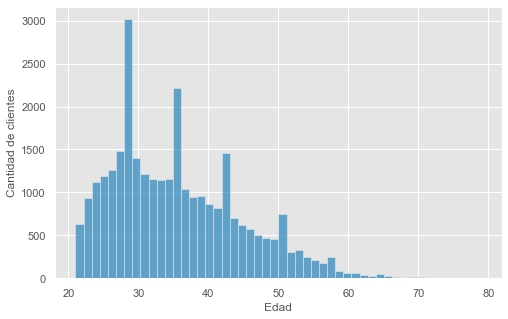

In [85]:
#Amount of the given credit
ax = sns.histplot(df.AGE, bins = 50);

# Change only ax2
#scale_x = 1e3
#ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
#ax.xaxis.set_major_formatter(ticks_x)

plt.xlabel('Edad')
plt.ylabel('Cantidad de clientes')

plt.savefig('edades.png', transparent=True, dpi=300, bbox_inches = "tight")

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


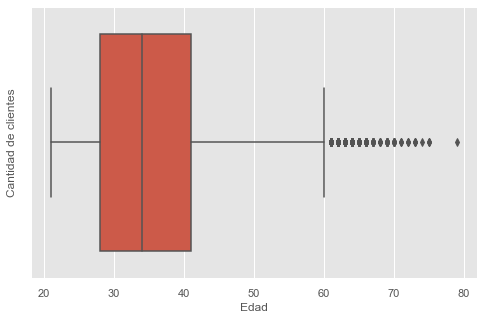

In [89]:
#Amount of the given credit
ax = sns.boxplot(df.AGE);

# Change only ax2
#scale_x = 1e3
#ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
#ax.xaxis.set_major_formatter(ticks_x)

plt.xlabel('Edad')
plt.ylabel('Cantidad de clientes')

plt.savefig('edades_bp.png', transparent=True, dpi=300, bbox_inches = "tight");

-----

# Relaciones entre variables

##### Default vs Genero

In [141]:
#Proporción de default entre hombres y mujeres
pd.crosstab(df['default.payment.next.month'] , df.COD_SEX, rownames=['Default'], colnames=['']).apply(lambda r:r/r.sum(),axis=0).round(2)

,Hombre,Mujer
Default,,
0,0.76,0.79
1,0.24,0.21


In [140]:
#Proporción de default entre hombres y mujeres - prueba de hipótesis
n_hombres = len(df[df.COD_SEX == 'Hombre'])
n_mujeres = len(df[df.COD_SEX == 'Mujer'])
defaults_hombres = df[df.COD_SEX == 'Hombre']['default.payment.next.month'].sum()
defaults_mujeres = df[df.COD_SEX == 'Mujer']['default.payment.next.month'].sum()

defaults  = np.array([defaults_hombres, defaults_mujeres])
totales = np.array([n_hombres, n_mujeres])

stat, pval = proportions_ztest(defaults, totales, alternative='larger')
print('Valor P: {}'.format(pval))

Valor P: 2.236402167907072e-12


##### Default vs Estado civil

In [143]:
pd.crosstab(df['default.payment.next.month'] , df.COD_MARRIAGE, rownames=['Default'], colnames=['']).apply(lambda r:r/r.sum(),axis=0)[['Casado', 'Soltero', 'Sin Información', 'Otros']] .round(2)

,Casado,Soltero,Sin Información,Otros
Default,,,,
0,0.77,0.79,0.91,0.74
1,0.23,0.21,0.09,0.26


In [139]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
n_casados = len(df[df.COD_MARRIAGE == 'Casado'])
n_solteros = len(df[df.COD_MARRIAGE == 'Soltero'])
defaults_casados = df[df.COD_MARRIAGE == 'Casado']['default.payment.next.month'].sum()
defaults_solteros = df[df.COD_MARRIAGE == 'Soltero']['default.payment.next.month'].sum()

defaults  = np.array([defaults_casados, defaults_solteros])
totales = np.array([n_casados, n_solteros])

stat, pval = proportions_ztest(defaults, totales, alternative='larger')
print('Valor P: {}'.format(pval))

Valor P: 7.242571714906423e-08


##### Default vs Educación

In [146]:
pd.crosstab(df['default.payment.next.month'] , df.COD_EDUCATION, rownames=['Default'], colnames=['']).apply(lambda r:r/r.sum(),axis=0)[['Bachillerato', 'Universitario', 'Posgrado', 'Otros', 'Sin Información']] .round(2)

,Bachillerato,Universitario,Posgrado,Otros,Sin Información
Default,,,,,
0,0.75,0.76,0.81,0.94,0.92
1,0.25,0.24,0.19,0.06,0.08


In [138]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
n_bachillerato = len(df[df.COD_EDUCATION == 'Bachillerato'])
n_universitario = len(df[df.COD_EDUCATION == 'Universitario'])
n_posgrado = len(df[df.COD_EDUCATION == 'Posgrado'])

defaults_bachillerato = df[df.COD_EDUCATION == 'Bachillerato']['default.payment.next.month'].sum()
defaults_universitario = df[df.COD_EDUCATION == 'Universitario']['default.payment.next.month'].sum()
defaults_posgrado = df[df.COD_EDUCATION == 'Posgrado']['default.payment.next.month'].sum()

defaults  = np.array([defaults_bachillerato, defaults_universitario])
totales = np.array([n_bachillerato, n_universitario])

stat, pval = proportions_ztest(defaults, totales)
print('Bachillerato - Universitario: Valor P: {}'.format(pval))

defaults  = np.array([defaults_universitario, defaults_posgrado])
totales = np.array([n_universitario, n_posgrado])

stat, pval = proportions_ztest(defaults, totales, alternative='larger')
print('Universitario - Posgrado: Valor P: {}'.format(pval))

Bachillerato - Universitario: Valor P: 0.044730341938218066
Universitario - Posgrado: Valor P: 1.2724828443089622e-17


##### Default vs Edad

In [110]:
df[['default.payment.next.month', 'AGE']].groupby('default.payment.next.month').mean().round(2)

,AGE
default.payment.next.month,
0,35.42
1,35.73


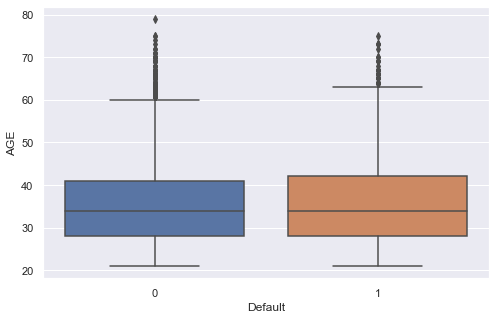

In [161]:
ax = sns.boxplot(x="default.payment.next.month", y="AGE", data=df)
plt.xlabel('Default');
plt.savefig('hip_test/edades.png', transparent=True, dpi=300, bbox_inches = "tight");

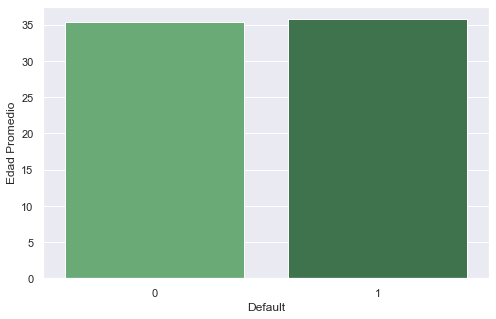

In [162]:
a = df[['default.payment.next.month', 'AGE']].groupby('default.payment.next.month').mean().round(2).reset_index()
a.columns = ['Default', 'Edad Promedio']
ax = sns.barplot(x=a['Default'], y =a['Edad Promedio'],palette="Greens_d");
plt.savefig('hip_test/edades_prom.png', transparent=True, dpi=300, bbox_inches = "tight");

In [131]:
#valor de t y p 
edad_0 = df[df['default.payment.next.month'] == 0].AGE
edad_1 = df[df['default.payment.next.month'] == 1].AGE
ttest,pval = ttest_ind(edad_0,edad_1)
print('Valor de t: '+str(ttest))
print('Valor p: '+ str(pval))

Valor de t: -2.40594177499625
Valor p: 0.01613684589016383


##### Default vs Monto

In [109]:
df[['default.payment.next.month', 'LIMIT_BAL']].groupby('default.payment.next.month').mean().round(2)

,LIMIT_BAL
default.payment.next.month,
0,178099.73
1,130109.66


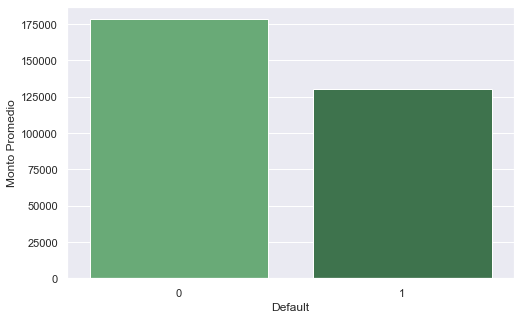

In [163]:
a = df[['default.payment.next.month', 'LIMIT_BAL']].groupby('default.payment.next.month').mean().round(2).reset_index()
a.columns = ['Default', 'Monto Promedio']
ax = sns.barplot(x=a['Default'], y =a['Monto Promedio'],palette="Greens_d");
plt.savefig('hip_test/montos_prom.png', transparent=True, dpi=300, bbox_inches = "tight");

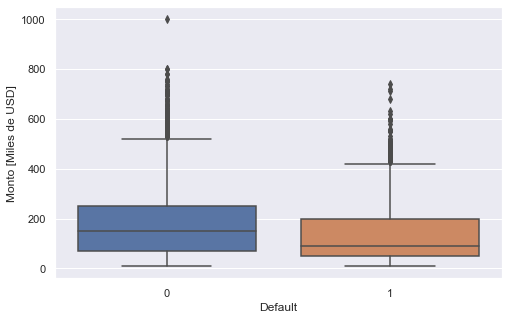

In [164]:
ax = sns.boxplot(x="default.payment.next.month", y="LIMIT_BAL", data=df)

scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.yaxis.set_major_formatter(ticks_y)

plt.ylabel('Monto [Miles de USD]');
plt.xlabel('Default');
plt.savefig('hip_test/montos.png', transparent=True, dpi=300, bbox_inches = "tight");

In [132]:
#valor de t y p 
valor_0 = df[df['default.payment.next.month'] == 0].LIMIT_BAL
valor_1 = df[df['default.payment.next.month'] == 1].LIMIT_BAL
ttest,pval = ttest_ind(valor_0, valor_1)
print('Valor de t: '+str(ttest))
print('Valor p: '+ str(pval))

Valor de t: 26.908521684796522
Valor p: 1.3022439532597397e-157
